## Importando Bibliotecas Necessárias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [25]:
cor_genero = ['#F781D8', '#819FF7']

## Buscando os dados necessários

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Dicionário das colunas

country = Paises (string)

year = Anos (integer)

sex = Genero (string)

age = Idade (integer)

suicides_no = N° de suicidios (integer)

population = População (integer)

suicides/100k pop = N° de suicidioss a cada 100 mil habitantes (float)

country-year = Pais e ano (string)

HDI for year = Indice de Desenvolvimento Humano por ano = (float)

gdp_for_year ($) = PIB por ano (string)

gdp_per_capita ($) = PIB per capita (float)

generation = Geração (string)


## Selecionando apenas o pais Brasil

In [28]:
df_brasil = df[df['country'] == 'Brazil'].copy()
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


## Verificando dados faltantes

In [29]:
print("World --------------------")
display(df.isnull().sum())
print("Brasil --------------------")
display(df_brasil.isnull().sum())

World --------------------


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Brasil --------------------


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

## Média de suicidios no Brasil X no Mundo

Text(0, 0.5, 'N° de casos a cada 100 mil pessoas')

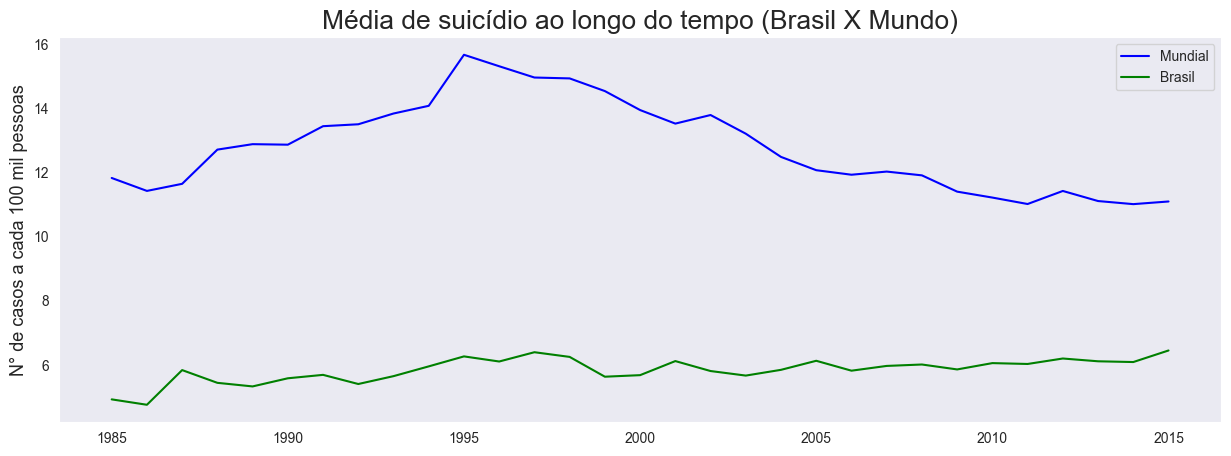

In [39]:
#Pegar a média mundial e do Brasil em suicídios
anos = df_brasil.year.unique()
suicidio_brasil_media = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicidio_mundial_media = df.groupby('year')['suicides/100k pop'].mean()
gdp_media_mundo = df.groupby('year')['gdp_per_capita ($)'].mean()
gdp_media_brasil = df_brasil.groupby('year')['gdp_per_capita ($)'].mean()

suicidio_mundial_media.drop(2016, inplace=True)

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=suicidio_mundial_media, label='Mundial', color='blue')
ax = sns.lineplot(x=anos, y = suicidio_brasil_media, label='Brasil', color='green')
plt.title('Média de suicídio ao longo do tempo (Brasil X Mundo)', fontsize=19)
plt.ylabel('N° de casos a cada 100 mil pessoas',fontsize=13)